In [129]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from train import load_dataset,train,eval

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
X_train, X_test, y_train, y_test = load_dataset(test_size=0.2)

In [131]:
dec_tree = train('DecisionTree',X_train,y_train,3)
ran_for = train('RandomForest',X_train,y_train,3)
xgb = train('XGB',X_train,y_train,3)
#lbg = train('LGB',X_train,y_train,3)
#cat = train('CAT',X_train,y_train,3)

In [132]:
dec_tree_logs_test = eval(dec_tree,X_test,y_test)
ran_for_logs_test = eval(ran_for,X_test,y_test)
xgb_logs_test = eval(xgb,X_test,y_test)
#lbg_logs = eval(lbg,X_test,y_test)
#cat_logs = eval(cat,X_test,y_test)

In [133]:
dec_treedf = pd.DataFrame(dec_tree_logs_test['report']).transpose()
ran_fordf = pd.DataFrame(ran_for_logs_test['report']).transpose()
xgbdf = pd.DataFrame(xgb_logs_test['report']).transpose()
#catdf = pd.DataFrame(cat_logs['report']).transpose()

In [134]:
dec_tree_logstrain = eval(dec_tree,X_train,y_train)
ran_for_logstrain = eval(ran_for,X_train,y_train)
xgb_logstrain = eval(xgb,X_train,y_train)

In [135]:
dec_treedftrain = pd.DataFrame(dec_tree_logstrain['report']).transpose()
ran_fordftrain = pd.DataFrame(ran_for_logstrain['report']).transpose()
xgbdftrain = pd.DataFrame(xgb_logstrain['report']).transpose()

In [136]:
dec_treedf

,precision,recall,f1-score,support
0,0.881436,0.987102,0.931281,1318.000000
1,0.949704,0.647177,0.769784,496.000000
accuracy,0.894157,0.894157,0.894157,0.894157
macro avg,0.915570,0.817140,0.850533,1814.000000
weighted avg,0.900103,0.894157,0.887123,1814.000000


In [137]:
dec_treedftrain

,precision,recall,f1-score,support
0,0.884478,0.989374,0.933990,5270.000000
1,0.958793,0.656754,0.779539,1984.000000
accuracy,0.898401,0.898401,0.898401,0.898401
macro avg,0.921636,0.823064,0.856765,7254.000000
weighted avg,0.904804,0.898401,0.891747,7254.000000


In [138]:
ran_fordf

,precision,recall,f1-score,support
0,0.883029,0.990895,0.933858,1318.000000
1,0.964179,0.651210,0.777377,496.000000
accuracy,0.898015,0.898015,0.898015,0.898015
macro avg,0.923604,0.821052,0.855617,1814.000000
weighted avg,0.905218,0.898015,0.891071,1814.000000


In [139]:
ran_fordftrain

,precision,recall,f1-score,support
0,1.0,1.0,1.0,5270.0
1,1.0,1.0,1.0,1984.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,7254.0
weighted avg,1.0,1.0,1.0,7254.0


In [140]:
xgbdf

,precision,recall,f1-score,support
0,0.907771,0.948407,0.927644,1318.000000
1,0.844394,0.743952,0.790997,496.000000
accuracy,0.892503,0.892503,0.892503,0.892503
macro avg,0.876082,0.846179,0.859320,1814.000000
weighted avg,0.890441,0.892503,0.890281,1814.000000


In [141]:
xgbdftrain

,precision,recall,f1-score,support
0,0.969764,0.992030,0.980771,5270.00000
1,0.977456,0.917843,0.946712,1984.00000
accuracy,0.971740,0.971740,0.971740,0.97174
macro avg,0.973610,0.954937,0.963741,7254.00000
weighted avg,0.971868,0.971740,0.971456,7254.00000


In [142]:
import matplotlib.pyplot as plt

In [143]:
def plot_feature_importance(model, feature_names, top_n=10):
    """
    Plots the top_n most significant features based on feature importance from a fitted model.
    Args:
        model: Trained tree-based model with feature_importances_ attribute.
        feature_names: List of feature names.
        top_n: Number of top features to display.
    """
    importances = model.feature_importances_
    feat_imp = pd.Series(importances, index=feature_names)
    top_features = feat_imp.sort_values(ascending=False).head(top_n)

    plt.figure(figsize=(8, 6))
    top_features.plot(kind='barh')
    plt.title(f'Top {top_n} Feature Importances')
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    print(top_features)

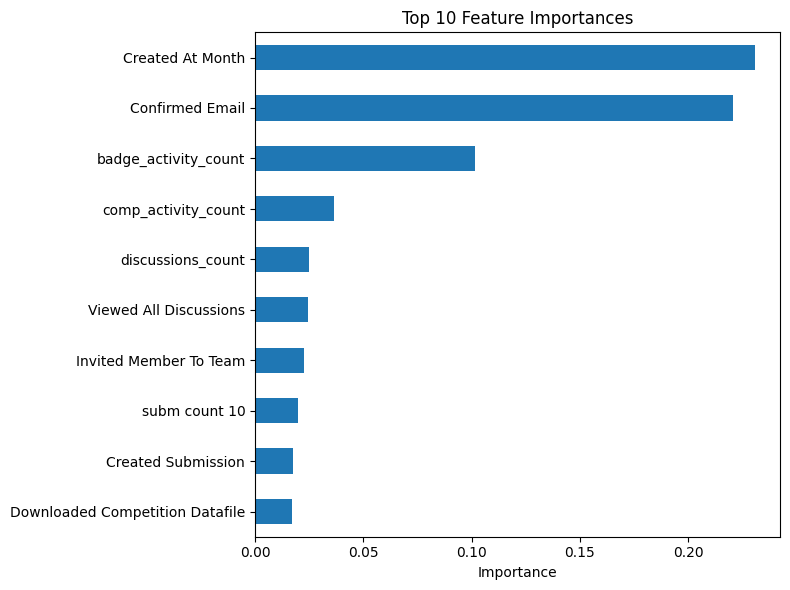

Created At Month                   0.230777
Confirmed Email                    0.220684
badge_activity_count               0.101524
comp_activity_count                0.036614
discussions_count                  0.024716
Viewed All Discussions             0.024378
Invited Member To Team             0.022442
subm count 10                      0.019810
Created Submission                 0.017359
Downloaded Competition Datafile    0.016912
dtype: float32


In [144]:
plot_feature_importance(xgb.best_estimator_.get_params()['model'],X_train.columns)